"""
# Traffic Time Index (TTI) Analysis in Casablanca Areas

This analysis examines traffic patterns across different communes in Casablanca using Traffic Time Index (TTI) data. The study incorporates:
- Population demographics
- Transportation infrastructure
- Road types
- Land use variables
- Hourly TTI measurements across a full week

The goal is to identify patterns and relationships between urban characteristics and traffic congestion.
"""

In [21]:
# %% 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# %% 📂 Load Excel File and List Sheet Names
file_path = "./data/dataset.xlsx"
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print("Available sheets:", sheet_names)

Available sheets: ['Summary', 'Table 0. Coordinates', 'Table 1. Population size in eac', 'Table 2. Number of Tram and Bus', 'Table 3. Type of roads', 'Table 4. Land use variables ', 'Table 5. Monday', 'Table 6. Tuesday', 'Table 7. Wednesday', 'Table. 8 Thursday', 'Table. 9 Friday', 'Table. 10 Saturday', 'Table. 11 Sunday']


In [23]:
# %% 📑 Define Sheets to Load and Clean
target_sheets = [
    'Table 1. Population size in eac', 'Table 2. Number of Tram and Bus',
    'Table 3. Type of roads', 'Table 4. Land use variables ',
    'Table 5. Monday', 'Table 6. Tuesday', 'Table 7. Wednesday',
    'Table. 8 Thursday', 'Table. 9 Friday', 'Table. 10 Saturday', 'Table. 11 Sunday'
]

cleaned_data = {}

In [24]:
# %% 🔁 Load and Clean All Sheets
for sheet in target_sheets:
    print(f"Processing: {sheet}")
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Remove header rows
    if sheet in ['Table 6. Tuesday', 'Table 7. Wednesday','Table. 8 Thursday', 'Table. 9 Friday', 'Table. 10 Saturday', 'Table. 11 Sunday']:
        df = df.iloc[9:].copy()
    else:
        if sheet == 'Table 5. Monday':
            df = df.iloc[7:].copy()
        else:
            df = df.iloc[8:].copy()

    # Remove unnamed columns
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

    # Use first row as header
    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)
    df.columns.name = None

    cleaned_data[sheet] = df

Processing: Table 1. Population size in eac
Processing: Table 2. Number of Tram and Bus
Processing: Table 3. Type of roads
Processing: Table 4. Land use variables 
Processing: Table 5. Monday
Processing: Table 6. Tuesday
Processing: Table 7. Wednesday
Processing: Table. 8 Thursday
Processing: Table. 9 Friday
Processing: Table. 10 Saturday
Processing: Table. 11 Sunday


In [25]:
# %% 🧱 Extract and Prepare Tables
df_population = cleaned_data['Table 1. Population size in eac']
df_transport = cleaned_data['Table 2. Number of Tram and Bus']
df_roads = cleaned_data['Table 3. Type of roads']
df_land_use = cleaned_data['Table 4. Land use variables ']

df_monday = cleaned_data['Table 5. Monday']
df_tuesday = cleaned_data['Table 6. Tuesday']
df_wednesday = cleaned_data['Table 7. Wednesday']
df_thursday = cleaned_data['Table. 8 Thursday']
df_friday = cleaned_data['Table. 9 Friday']
df_saturday = cleaned_data['Table. 10 Saturday']
df_sunday = cleaned_data['Table. 11 Sunday']

In [26]:
df_roads.head()

,Commune,ZIP code,N° of Primary roads,N° of Secondery roads,N° of Highways
0,Echchallalate,28822,6,2,22
1,Sidi Maarouf,20192,12,11,19
2,Anfa,20040,143,154,42
3,Assoukhour Assawda,20320,64,75,2
4,Ben Msick,20023,10,26,18


In [27]:
# %% 🧽 Merge Base Data (Population, Transport, Roads, Land Use)
def clean_base_df(df):
    df = df.copy()
    if 'ZIP code' in df.columns:
        df.drop(columns=['ZIP code'], inplace=True)
    if 'Commune' in df.columns:
        df['Commune'] = df['Commune'].str.strip()
    return df

dfs = [df_population, df_transport, df_roads, df_land_use]
cleaned = [clean_base_df(df) for df in dfs]

for i, df in enumerate(cleaned):
    print(f"DataFrame {i} columns: {df.columns.tolist()}")


df_merged = cleaned[0]
for df in cleaned[1:]:
    df_merged = df_merged.merge(df, on='Commune', how='outer')

# Convert all columns (except Commune) to numeric
for col in df_merged.columns[1:]:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

print(f"{df_merged.shape[0]} rows, {df_merged.shape[1]} columns")

DataFrame 0 columns: ['Commune', 'Population size', 'Household', 'Density']
DataFrame 1 columns: ['Commune', 'Tram-Station', 'Bus-Station']
DataFrame 2 columns: ['Commune', 'N° of Primary roads', 'N° of Secondery roads', 'N° of Highways']
DataFrame 3 columns: ['Commune', 'Region area (m²)', 'Parking area (m²)', 'Industrial area  (m²) ', 'Parks area  (m²)', 'Residential area (m²)', 'University/ Institution area (m²)', 'Number of Commercial Buildings']
22 rows, 16 columns


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\4040107584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merged.sort_values('Density', ascending=False), x='Commune', y='Density', palette='viridis')


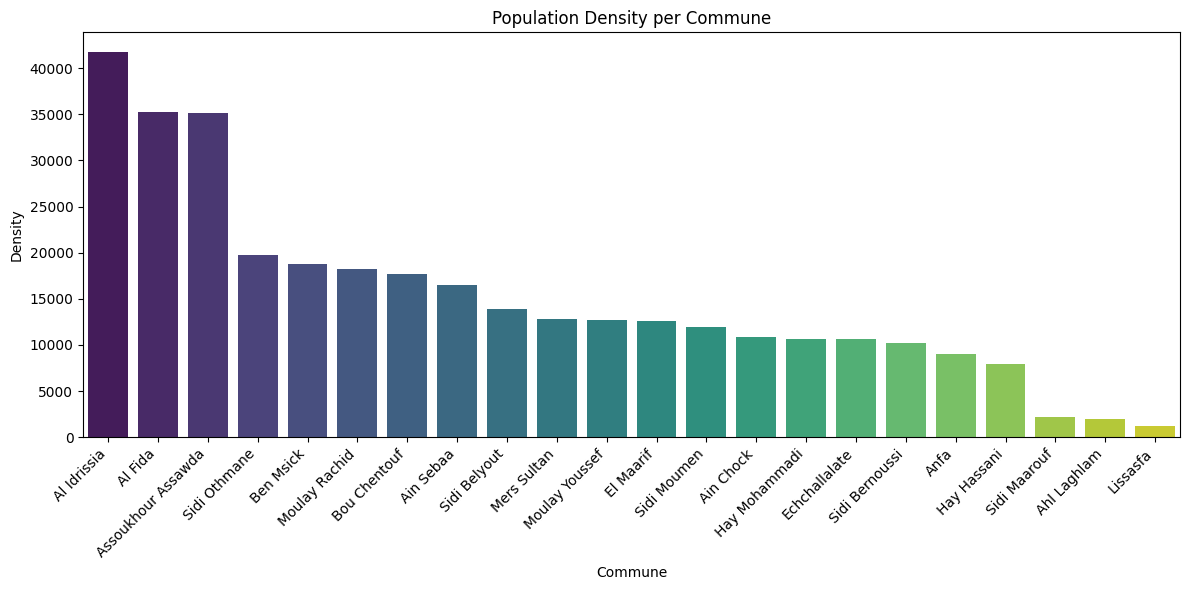

In [28]:
# %% 📉 Population Density Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_merged.sort_values('Density', ascending=False), x='Commune', y='Density', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Population Density per Commune')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1128005056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merged.sort_values(feature, ascending=False), x='Commune', y=feature, palette=palette)


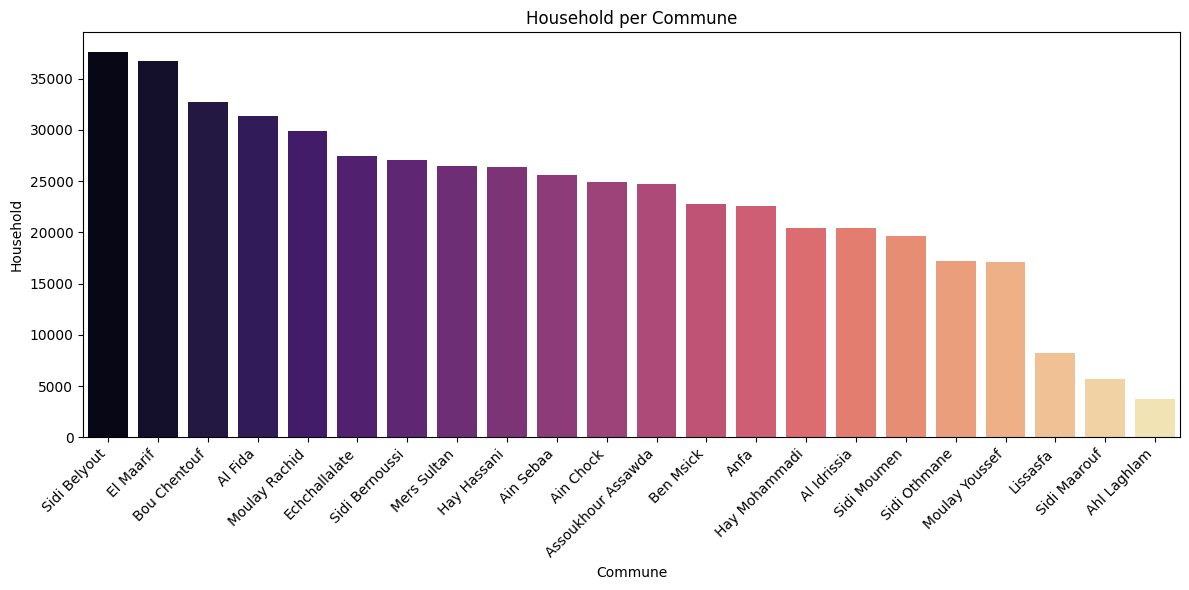

C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1128005056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merged.sort_values(feature, ascending=False), x='Commune', y=feature, palette=palette)


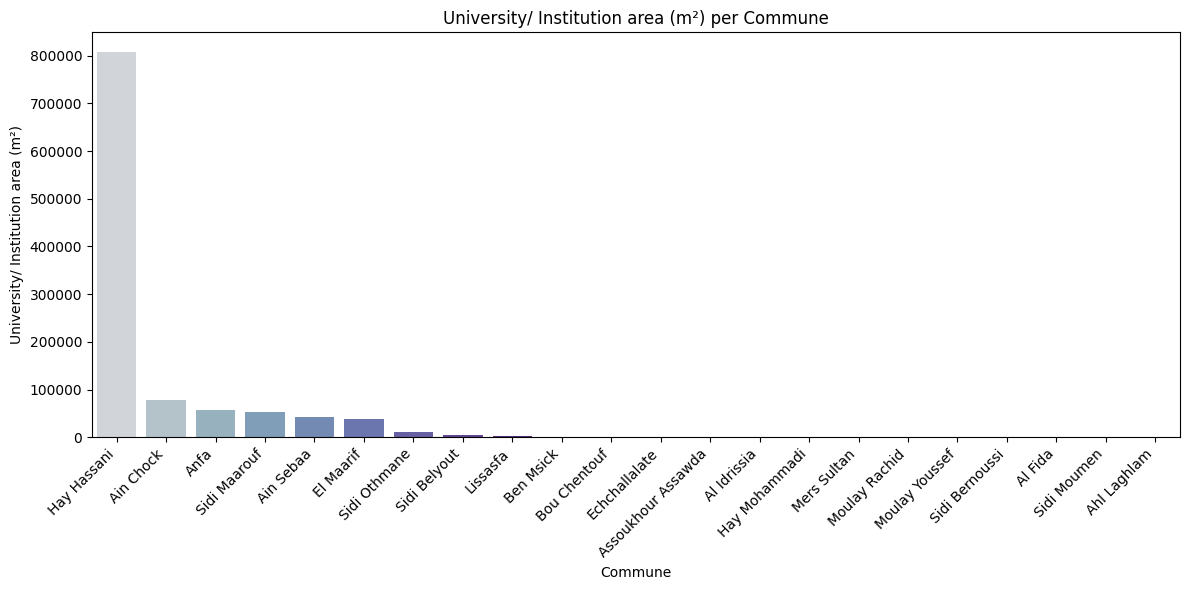

C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1128005056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merged.sort_values(feature, ascending=False), x='Commune', y=feature, palette=palette)


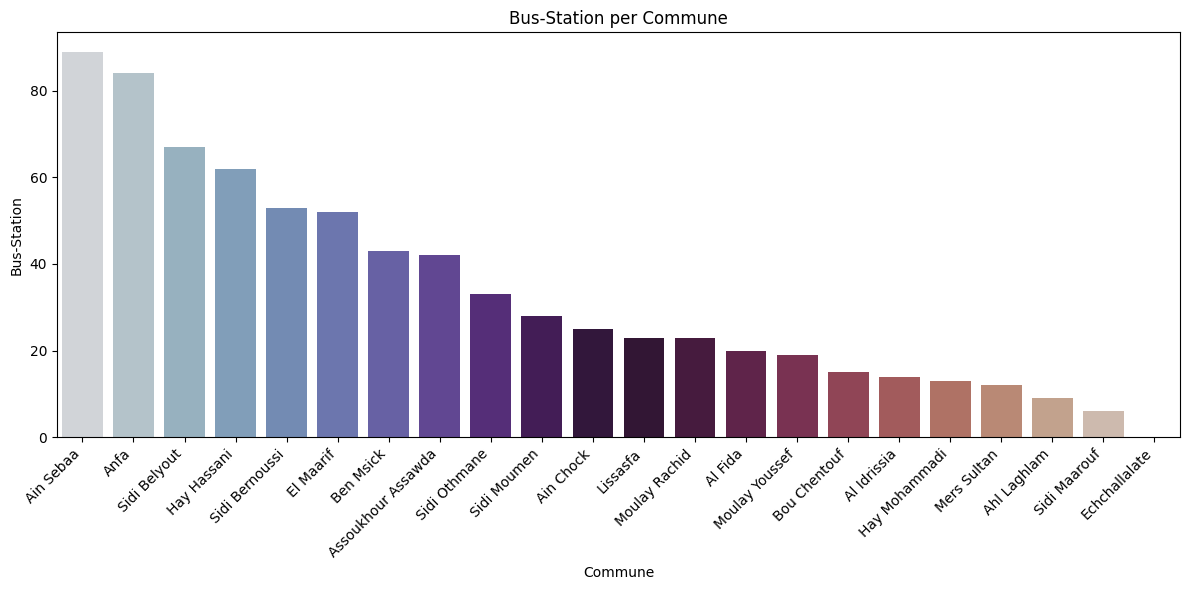

In [29]:
# %% 📉 Other Feature Plots
features_to_plot = ['Household', 'University/ Institution area (m²)', 'Bus-Station']
palettes = ['magma', 'twilight', 'twilight']

for feature, palette in zip(features_to_plot, palettes):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_merged.sort_values(feature, ascending=False), x='Commune', y=feature, palette=palette)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{feature} per Commune')
    plt.tight_layout()
    plt.show()

In [30]:
# %% 🧹 Function to Clean TTI Data
def clean_tti_df(df):
    df = df.copy()
    new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
    df.columns = pd.MultiIndex.from_frame(new_columns)

    df.drop(columns=['Travel real-time (min) at each hour', 'Distance (Km)'], inplace=True, errors='ignore')
    df.columns = df.iloc[0]
    df = df[1:]

    for col in ['Latitude', 'Longitude', 'Coordinates', 'from_index', 'to_index', 'ZIP code']:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)

    if 'COMMUNE' in df.columns:
        df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')
        df.rename(columns={'COMMUNE': 'Commune'}, inplace=True)

    return df


In [31]:
# %% 🧬 Transform Daily TTI into Long Format
def compute_tti_melted(df_day):
    df_cleaned = clean_tti_df(df_day)
    df_grouped = df_cleaned.groupby('Commune').mean(numeric_only=True).reset_index()
    df_melted = df_grouped.melt(id_vars='Commune', var_name='Hour', value_name='TTI')
    return df_melted

In [32]:
# %% 📊 Plot TTI by Hour and Commune
def plot_tti(df_melted, day_name):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x='Hour', y='TTI', hue='Commune')
    plt.title(f"Hourly Average TTI per Commune ({day_name})")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Processing Monday


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')


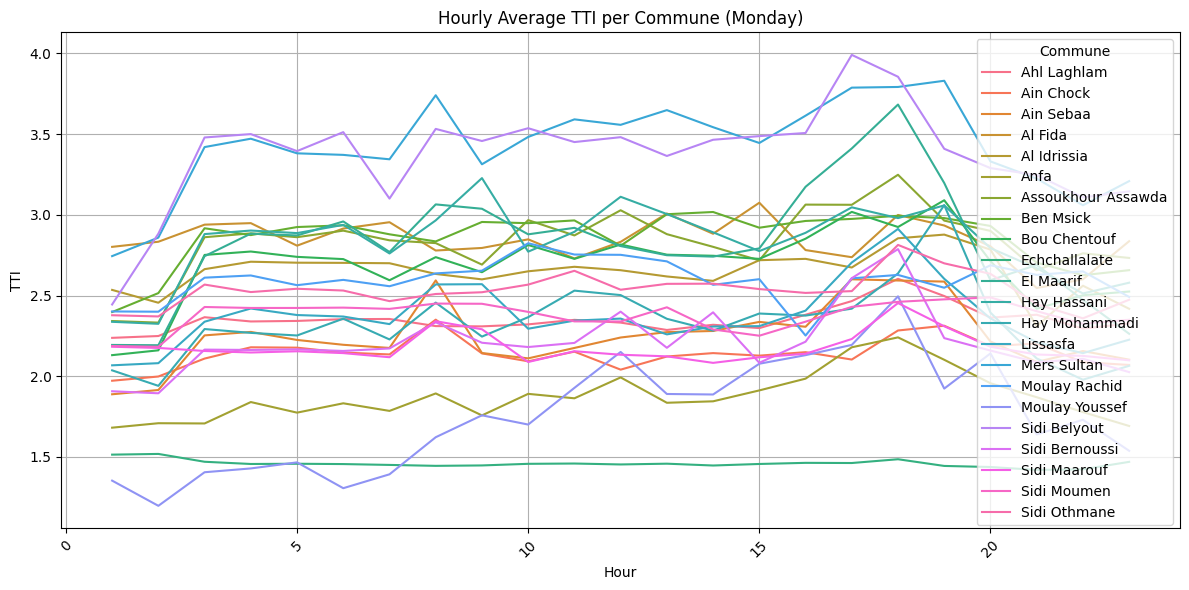


Processing Tuesday


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')


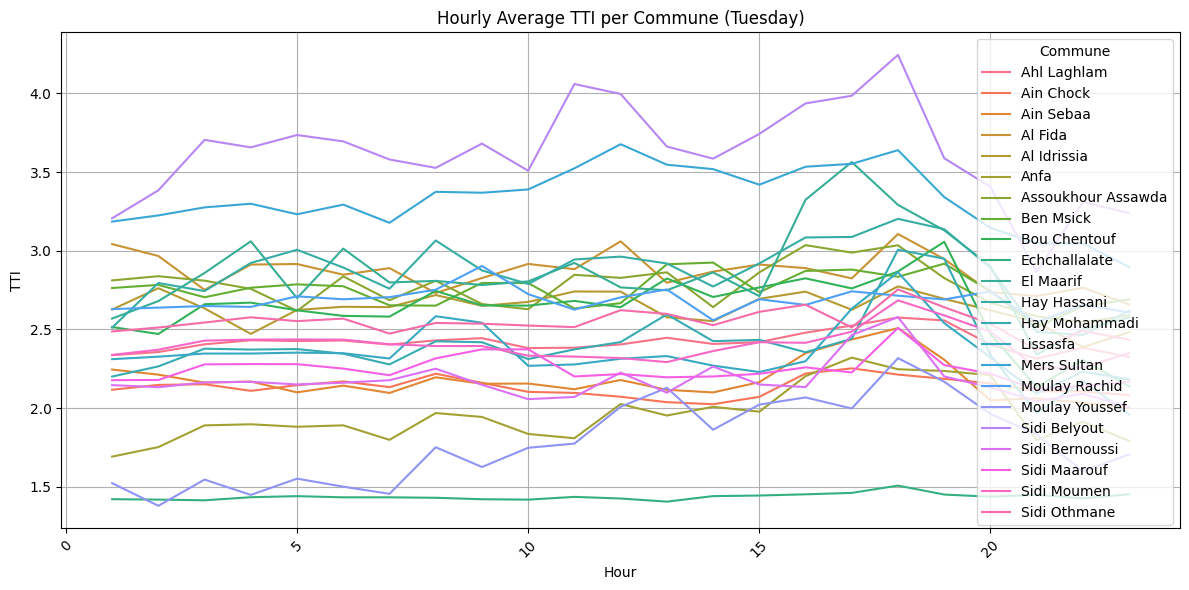


Processing Wednesday


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')


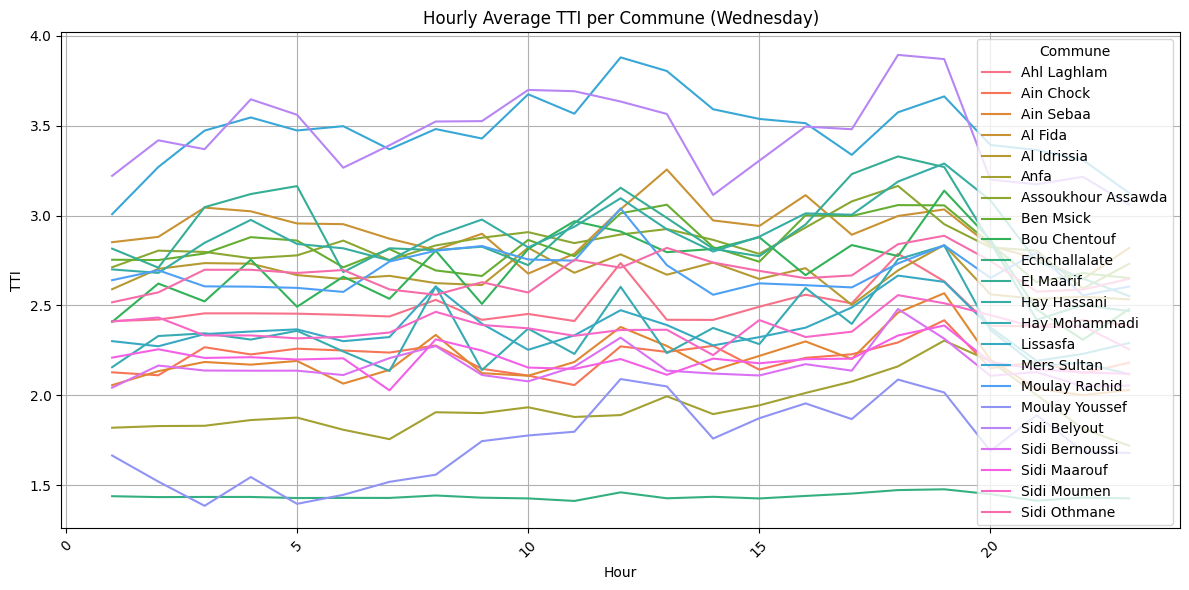


Processing Thursday


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')


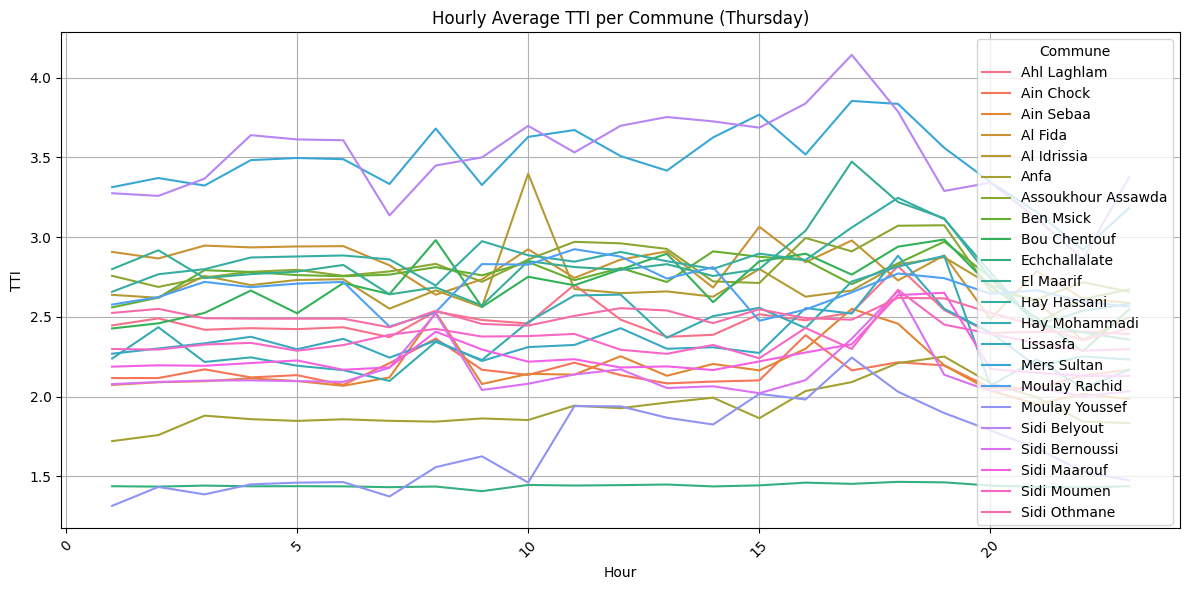


Processing Friday


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')


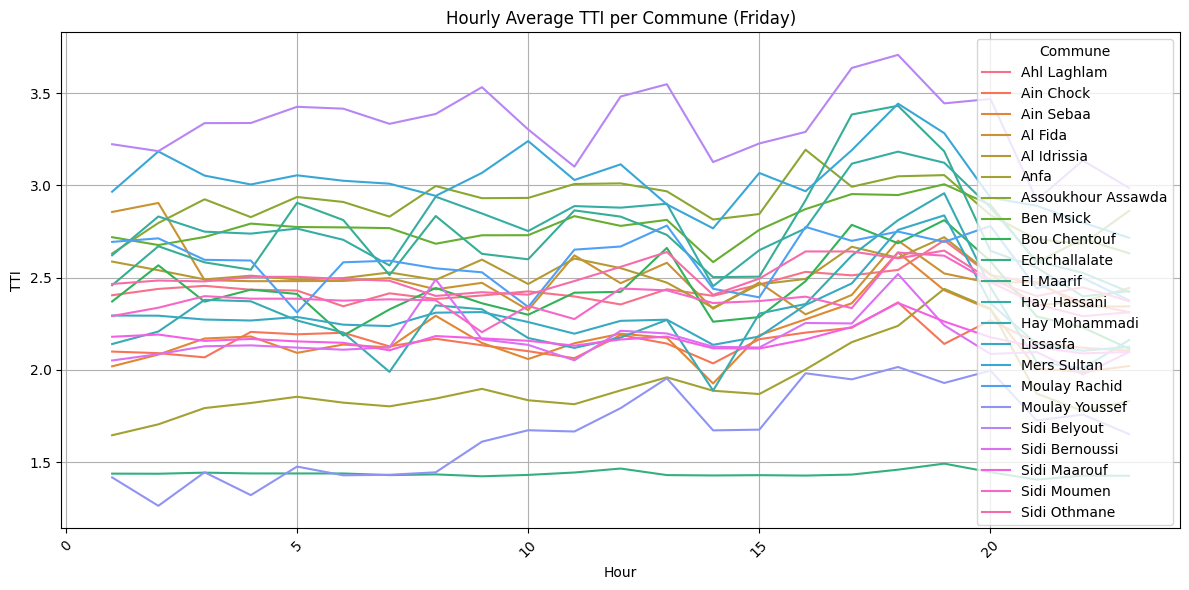


Processing Saturday


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')


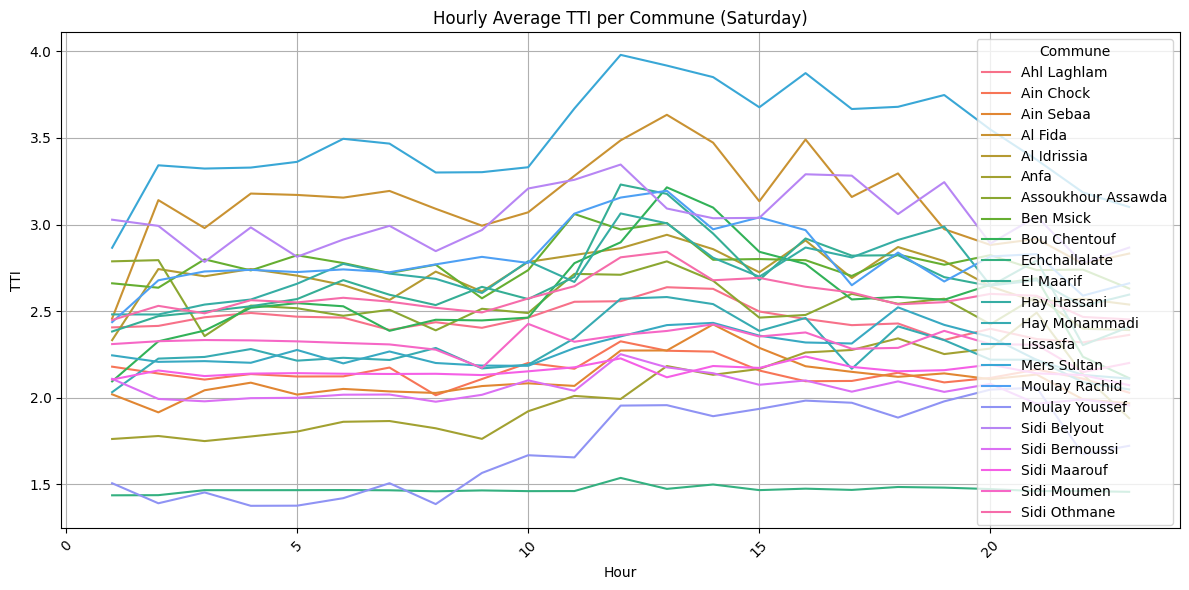


Processing Sunday


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')


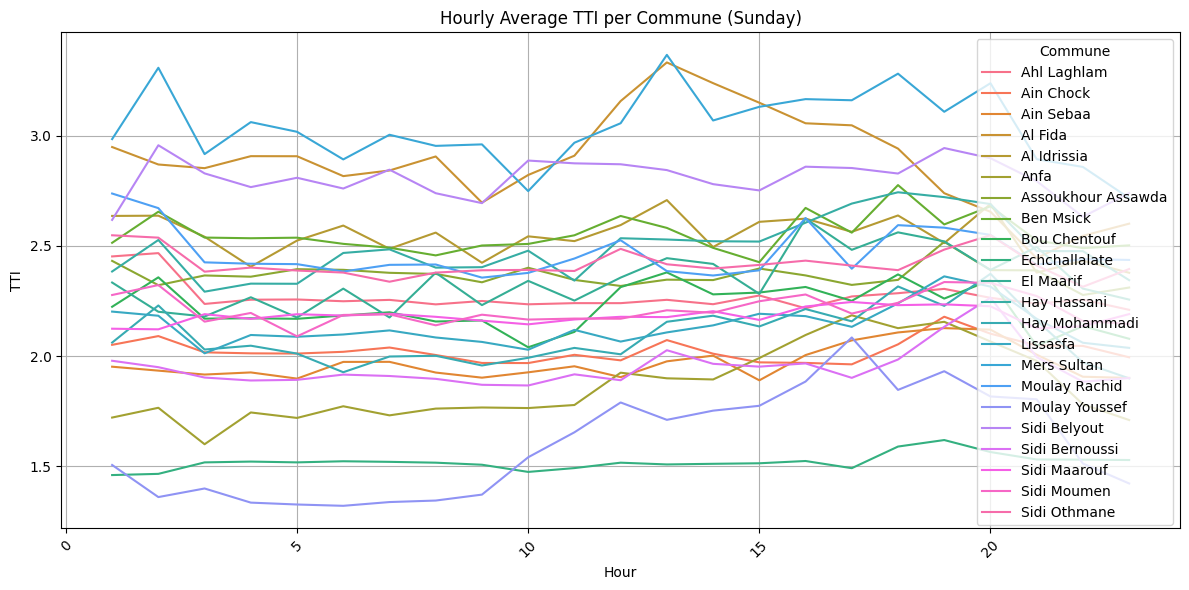

In [33]:
# %% 🔁 Process All Days
days = {
    'Monday': df_monday,
    'Tuesday': df_tuesday,
    'Wednesday': df_wednesday,
    'Thursday': df_thursday,
    'Friday': df_friday,
    'Saturday': df_saturday,
    'Sunday': df_sunday,
}

# Plot per-day per-commune TTI
for day, df in days.items():
    print(f"\nProcessing {day}")
    melted = compute_tti_melted(df)
    plot_tti(melted, day)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use Da

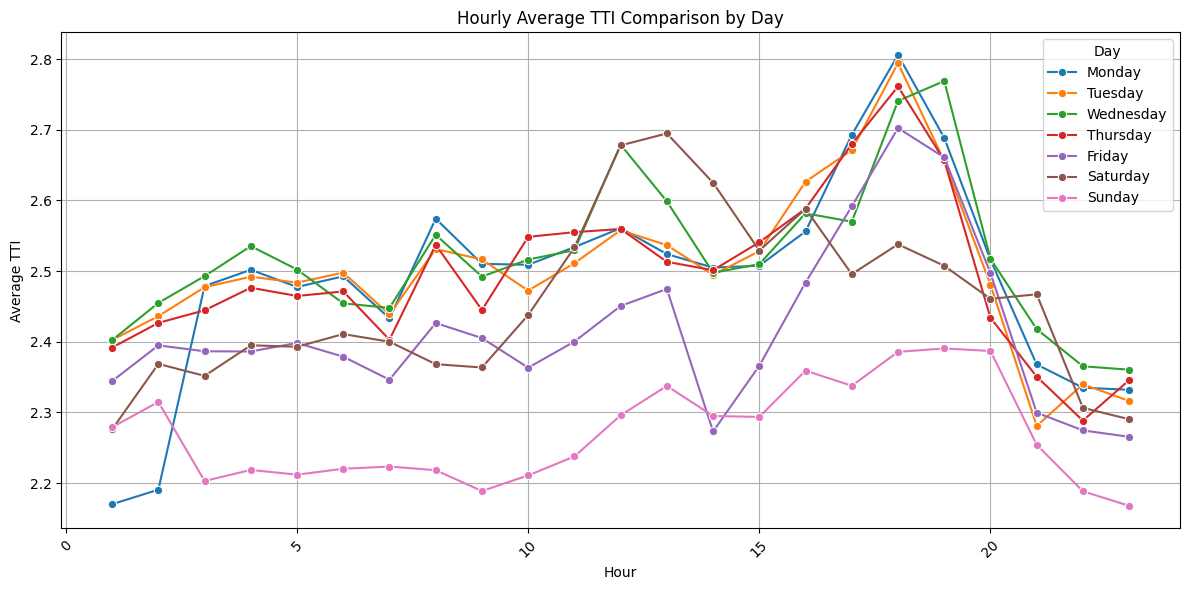

In [34]:
# %% 📈 Global Comparison of Daily TTI
daily_tti = []

for day, df in days.items():
    melted = compute_tti_melted(df)
    global_avg = melted.groupby('Hour')['TTI'].mean().reset_index()
    global_avg['Day'] = day
    daily_tti.append(global_avg)

tti_comparison = pd.concat(daily_tti)

plt.figure(figsize=(12, 6))
sns.lineplot(data=tti_comparison, x='Hour', y='TTI', hue='Day', marker='o')
plt.title("Hourly Average TTI Comparison by Day")
plt.xlabel("Hour")
plt.ylabel("Average TTI")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

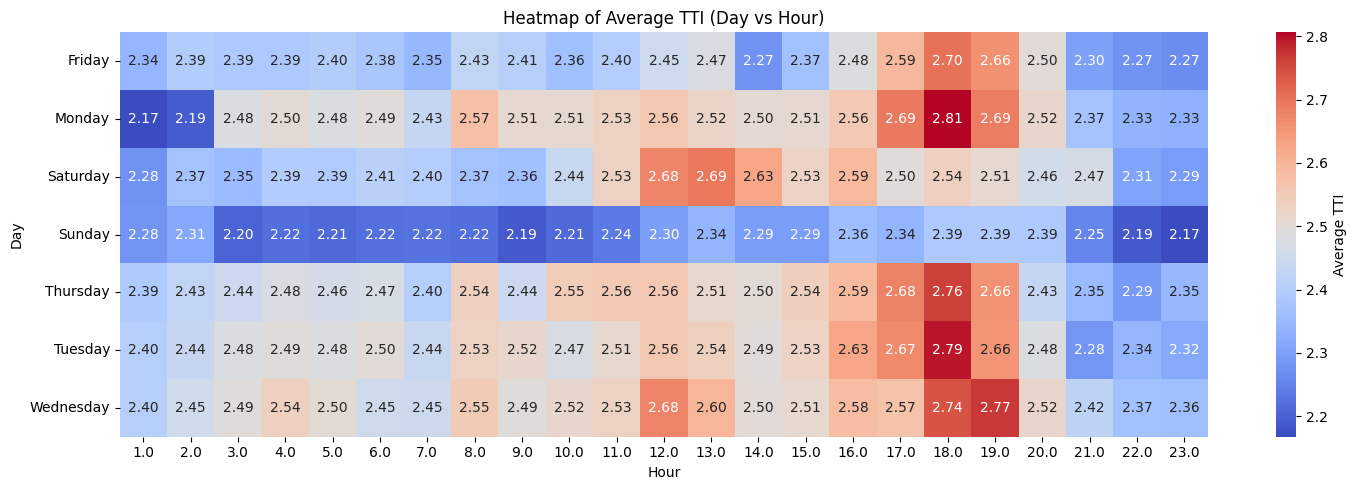

In [35]:
# %% 🔥 Heatmap: Day vs Hour
pivot_global = tti_comparison.pivot(index='Day', columns='Hour', values='TTI')

plt.figure(figsize=(15, 5))
sns.heatmap(pivot_global, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Average TTI'})
plt.title("Heatmap of Average TTI (Day vs Hour)")
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_columns = df_tuesday.columns.to_frame().applymap(lambda x: x.strip() if isinstance(x, str) else x).fillna(method='ffill', axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['COMMUNE'] = df['COMMUNE'].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1616194804.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use Da

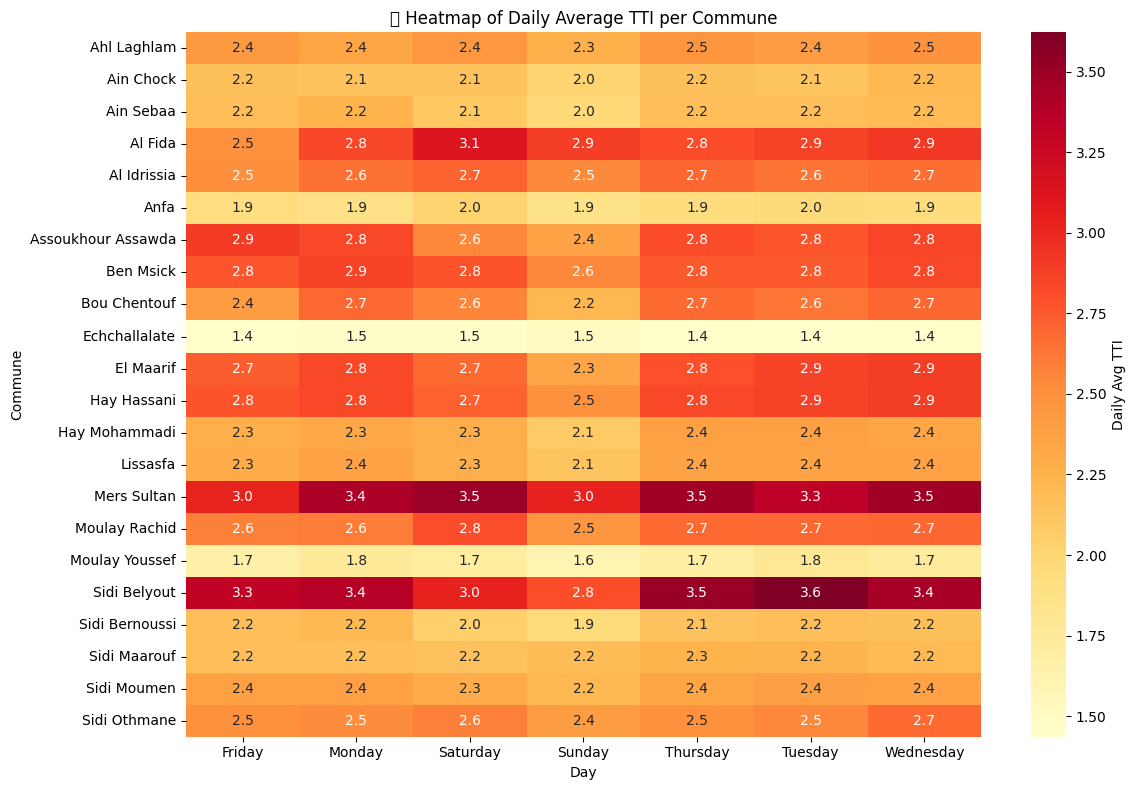

In [36]:
# %% 🧱 Heatmap: Commune vs Day (Daily Average TTI)
daily_commune_tti = []

for day, df in days.items():
    df_cleaned = clean_tti_df(df)
    df_numeric = df_cleaned.select_dtypes(include='number')
    df_final = pd.concat([df_cleaned[['Commune']], df_numeric], axis=1)

    grouped = df_final.groupby('Commune').mean(numeric_only=True)
    grouped['Daily_TTI'] = grouped.mean(axis=1)
    grouped['Day'] = day

    daily_commune_tti.append(grouped[['Day', 'Daily_TTI']])

# Combine and pivot
df_commune_tti = pd.concat(daily_commune_tti).reset_index()
pivot_commune_day = df_commune_tti.pivot(index='Commune', columns='Day', values='Daily_TTI')

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_commune_day, cmap='YlOrRd', annot=True, fmt=".1f", cbar_kws={'label': 'Daily Avg TTI'})
plt.title("🔥 Heatmap of Daily Average TTI per Commune")
plt.tight_layout()
plt.show()


In [37]:
pivot_commune_day.columns.name=None
pivot_commune_day.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Commune,,,,,,,
Ahl Laghlam,2.440679,2.351775,2.448688,2.268578,2.474905,2.420521,2.479687
Ain Chock,2.155090,2.143123,2.144303,2.024804,2.156802,2.133931,2.207847
Ain Sebaa,2.173155,2.249415,2.106610,1.969087,2.165072,2.176557,2.195351
Al Fida,2.498381,2.843489,3.120170,2.886011,2.819001,2.867910,2.915183
Al Idrissia,2.512699,2.644822,2.710127,2.543054,2.691687,2.635862,2.662404


In [38]:
pivot_commune_day.reset_index(inplace=True)
pivot_commune_day.head()

,Commune,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Ahl Laghlam,2.440679,2.351775,2.448688,2.268578,2.474905,2.420521,2.479687
1,Ain Chock,2.155090,2.143123,2.144303,2.024804,2.156802,2.133931,2.207847
2,Ain Sebaa,2.173155,2.249415,2.106610,1.969087,2.165072,2.176557,2.195351
3,Al Fida,2.498381,2.843489,3.120170,2.886011,2.819001,2.867910,2.915183
4,Al Idrissia,2.512699,2.644822,2.710127,2.543054,2.691687,2.635862,2.662404


In [39]:
df_merged.head()

,Commune,Population size,Household,Density,Tram-Station,Bus-Station,N° of Primary roads,N° of Secondery roads,N° of Highways,Region area (m²),Parking area (m²),Industrial area (m²),Parks area (m²),Residential area (m²),University/ Institution area (m²),Number of Commercial Buildings
0,Ahl Laghlam,22926.000000,3735.000000,1950.400024,0,9,13,0,5,10993811.75,0.00,140944.895,0.000,2.083745e+06,0.000,0
1,Ain Chock,147945.000000,24882.000000,10875.911133,0,25,49,39,0,11921014.52,3527.58,15608.930,10678.368,6.967286e+06,78479.440,1
2,Ain Sebaa,147102.609375,25559.923828,16482.414062,22,89,91,49,49,22512645.04,68143.04,5780586.558,389388.738,1.249894e+07,41906.473,6
3,Al Fida,155982.375000,31322.000000,35225.500000,2,20,23,41,0,1804727.91,12239.58,0.000,13596.129,1.700397e+06,0.000,7
4,Al Idrissia,109565.000000,20423.000000,41799.218750,0,14,18,40,9,1793994.56,0.00,24591.837,63843.800,1.215656e+06,0.000,0


In [40]:
df_final = pd.merge(df_merged,pivot_commune_day,  on='Commune', how='left')
df_final.head()

,Commune,Population size,Household,Density,Tram-Station,Bus-Station,N° of Primary roads,N° of Secondery roads,N° of Highways,Region area (m²),...,Residential area (m²),University/ Institution area (m²),Number of Commercial Buildings,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Ahl Laghlam,22926.000000,3735.000000,1950.400024,0,9,13,0,5,10993811.75,...,2.083745e+06,0.000,0,2.440679,2.351775,2.448688,2.268578,2.474905,2.420521,2.479687
1,Ain Chock,147945.000000,24882.000000,10875.911133,0,25,49,39,0,11921014.52,...,6.967286e+06,78479.440,1,2.155090,2.143123,2.144303,2.024804,2.156802,2.133931,2.207847
2,Ain Sebaa,147102.609375,25559.923828,16482.414062,22,89,91,49,49,22512645.04,...,1.249894e+07,41906.473,6,2.173155,2.249415,2.106610,1.969087,2.165072,2.176557,2.195351
3,Al Fida,155982.375000,31322.000000,35225.500000,2,20,23,41,0,1804727.91,...,1.700397e+06,0.000,7,2.498381,2.843489,3.120170,2.886011,2.819001,2.867910,2.915183
4,Al Idrissia,109565.000000,20423.000000,41799.218750,0,14,18,40,9,1793994.56,...,1.215656e+06,0.000,0,2.512699,2.644822,2.710127,2.543054,2.691687,2.635862,2.662404


In [42]:
df_final['Mean_TTI']=df_final[['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']].mean(axis=1)
df_final=df_final.drop(columns=['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday'])
df_final.head()

,Commune,Population size,Household,Density,Tram-Station,Bus-Station,N° of Primary roads,N° of Secondery roads,N° of Highways,Region area (m²),Parking area (m²),Industrial area (m²),Parks area (m²),Residential area (m²),University/ Institution area (m²),Number of Commercial Buildings,Mean_TTI
0,Ahl Laghlam,22926.000000,3735.000000,1950.400024,0,9,13,0,5,10993811.75,0.00,140944.895,0.000,2.083745e+06,0.000,0,2.412119
1,Ain Chock,147945.000000,24882.000000,10875.911133,0,25,49,39,0,11921014.52,3527.58,15608.930,10678.368,6.967286e+06,78479.440,1,2.137986
2,Ain Sebaa,147102.609375,25559.923828,16482.414062,22,89,91,49,49,22512645.04,68143.04,5780586.558,389388.738,1.249894e+07,41906.473,6,2.147892
3,Al Fida,155982.375000,31322.000000,35225.500000,2,20,23,41,0,1804727.91,12239.58,0.000,13596.129,1.700397e+06,0.000,7,2.850021
4,Al Idrissia,109565.000000,20423.000000,41799.218750,0,14,18,40,9,1793994.56,0.00,24591.837,63843.800,1.215656e+06,0.000,0,2.628665


In [43]:
df_final=df_final.set_index('Commune')
df_final.head()

,Population size,Household,Density,Tram-Station,Bus-Station,N° of Primary roads,N° of Secondery roads,N° of Highways,Region area (m²),Parking area (m²),Industrial area (m²),Parks area (m²),Residential area (m²),University/ Institution area (m²),Number of Commercial Buildings,Mean_TTI
Commune,,,,,,,,,,,,,,,,
Ahl Laghlam,22926.000000,3735.000000,1950.400024,0,9,13,0,5,10993811.75,0.00,140944.895,0.000,2.083745e+06,0.000,0,2.412119
Ain Chock,147945.000000,24882.000000,10875.911133,0,25,49,39,0,11921014.52,3527.58,15608.930,10678.368,6.967286e+06,78479.440,1,2.137986
Ain Sebaa,147102.609375,25559.923828,16482.414062,22,89,91,49,49,22512645.04,68143.04,5780586.558,389388.738,1.249894e+07,41906.473,6,2.147892
Al Fida,155982.375000,31322.000000,35225.500000,2,20,23,41,0,1804727.91,12239.58,0.000,13596.129,1.700397e+06,0.000,7,2.850021
Al Idrissia,109565.000000,20423.000000,41799.218750,0,14,18,40,9,1793994.56,0.00,24591.837,63843.800,1.215656e+06,0.000,0,2.628665


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\993325647.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_tti.values, y=corr_with_tti.index, palette='coolwarm')


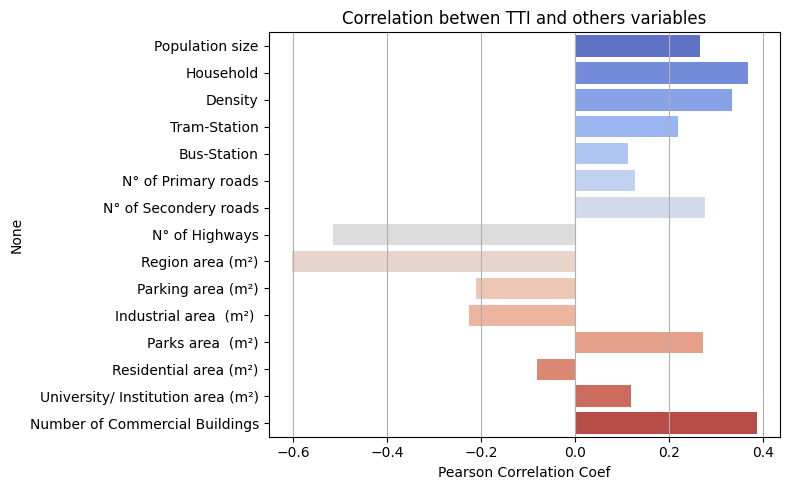

In [ ]:

df_num = df_final.select_dtypes(include='number')


corr_with_tti = df_num.corr()['Mean_TTI'].drop('Mean_TTI')


plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_tti.values, y=corr_with_tti.index, palette='coolwarm')
plt.title("Correlation between TTI and others variables")
plt.xlabel("Pearson Correlation Coef")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
